In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import pandas as pd

import matplotlib.pyplot as plt

## Getting Data for Training

Download the housing data.

In [2]:
housing = fetch_california_housing()

Let us extract the features table "X" and the target columns "y".

In [3]:
X = housing.data
y = housing.target

Check the shape of the features table and the target column.

In [4]:
X.shape, y.shape

((20640, 8), (20640,))

Let us print the first 5 rows and the first 4 columns of the features matrix.

In [5]:
X[:5,:4]

array([[ 8.3252    , 41.        ,  6.98412698,  1.02380952],
       [ 8.3014    , 21.        ,  6.23813708,  0.97188049],
       [ 7.2574    , 52.        ,  8.28813559,  1.07344633],
       [ 5.6431    , 52.        ,  5.8173516 ,  1.07305936],
       [ 3.8462    , 52.        ,  6.28185328,  1.08108108]])

Let us print the first 5 target values (prices) corresponding to the first 5 above shown rows.

In [22]:
y[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

## Constructing Human Readable Tables

Let us display our data in a human readable form using pandas library. First we construct a pandas table (called data-frame). For convenience we insert the targets to the table as the last columns. So, in that way, we get one table containing not only features but also the target.

In [ ]:
df = pd.DataFrame(X, columns = housing.feature_names)
df['Target'] = y

Print the first 5 rows of this table.

In [25]:
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


## Training the First Model

Let’s split the features table and the target column into two parts. This way, some houses—with their features and prices—end up in one dataset (called the "train" set), while the rest go into another dataset (called the "test" set). We specify that 40% of data should go to the "test" dataset. The split is done randomly.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

Here, we create two models: m1 and m2. The first is a linear regressor, and the second is a decision tree regressor.

In [13]:
m1 = LinearRegression()
m2 = DecisionTreeRegressor()

Let’s train the two models (training is also referred to as “fitting”).
To train (or fit) a model, we need to provide two arguments: (1) the features table "X" and (2) the target column "y". During training, the model learns how to combine the features to generate predictions that are as close as possible to the target values.

In [14]:
m1.fit(X_train, y_train)

LinearRegression()

In [15]:
m2.fit(X_train, y_train)

DecisionTreeRegressor()

Now that the models are trained, we can use them to predict target values for feature tables they haven’t seen during training.

In [26]:
p1_test = m1.predict(X_test)
p2_test = m2.predict(X_test)

## Examining Predictions

Let us examine the predictions. First we construct a human readable table using pandas library. We add the predictions to the table. So, we have two new columns.

In [27]:
df_test = pd.DataFrame(X_test, columns = housing.feature_names)
df_test['Target'] = y_test
df_test['Preds_1'] = p1_test
df_test['Preds_2'] = p2_test

In [28]:
df_test.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,Preds_1,Preds_2
0,6.8645,17.0,8.642586,1.133080,700.0,2.661597,36.83,-119.84,1.959,2.546068,5.00001
1,5.8002,19.0,6.610860,0.943439,1221.0,2.762443,38.32,-122.32,2.387,2.635832,2.58900
2,1.6500,52.0,2.532203,1.033898,1630.0,2.762712,37.76,-122.42,2.650,1.949169,2.25000
3,5.3288,10.0,6.196762,1.057285,2089.0,2.601494,38.07,-122.18,2.018,2.523723,2.79400
4,2.4583,35.0,3.741935,1.064516,538.0,2.169355,33.19,-117.38,1.979,1.769808,1.87500
5,1.7344,47.0,4.384615,0.993846,949.0,2.920000,36.76,-119.78,0.513,0.953677,0.56000
6,8.5491,20.0,6.763699,1.047945,703.0,2.407534,33.81,-118.38,4.103,4.130994,3.32700
7,2.1603,28.0,4.808173,0.995460,2008.0,2.279228,38.74,-120.78,1.113,0.508495,1.33100
8,3.6680,19.0,4.544658,1.087566,1728.0,3.026270,33.47,-117.69,2.438,2.084030,2.79500
9,4.6315,16.0,6.366521,1.078775,2306.0,2.522976,33.92,-117.80,2.775,2.107600,2.96400


## Visualizing Predictions

Let us plot predicted prices versus their real values.

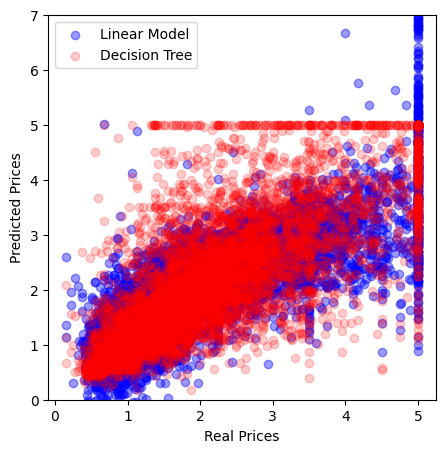

In [30]:
plt.figure(figsize = (5,5))
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.ylim([0,7])
plt.scatter(df_test.Target, df_test.Preds_1, color = 'b', marker = 'o', alpha = 0.4, label = 'Linear Model')
plt.scatter(df_test.Target, df_test.Preds_2, color = 'r', marker = 'o', alpha = 0.2, label = 'Decision Tree')
plt.legend()
plt.show()

## Loading Financial Data (Stock Prices)

Let us import the Yahoo finance library to load stock prices.

In [31]:
import yfinance as yf

Load the data by specifying the ticker (which serves as a unique ID for the company), the start date, and the end date.

In [61]:
google = yf.download(
    "GOOGL",
    start = "2020-01-01",  
    end = "2025-08-01", 
    auto_adjust = True
    )
google = google.droplevel(level='Ticker', axis=1)

[*********************100%***********************]  1 of 1 completed


Let’s print the first 5 rows of the loaded table. Note the data give as a pandas data-frame.

In [37]:
google.head(5)

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,68.026016,68.026016,66.923134,67.018562,27278000
2020-01-03,67.670158,68.278016,66.964392,66.998193,23408000
2020-01-06,69.473846,69.499192,67.147300,67.178606,46768000
2020-01-07,69.339653,69.756654,69.163213,69.605560,34330000
2020-01-08,69.833191,70.171661,69.216391,69.325236,35314000


## Visualizing Stock Prices

In [39]:
import mplfinance as mpf

In [40]:
google_cut = google[google.index > pd.Timestamp("2025-06-01")]

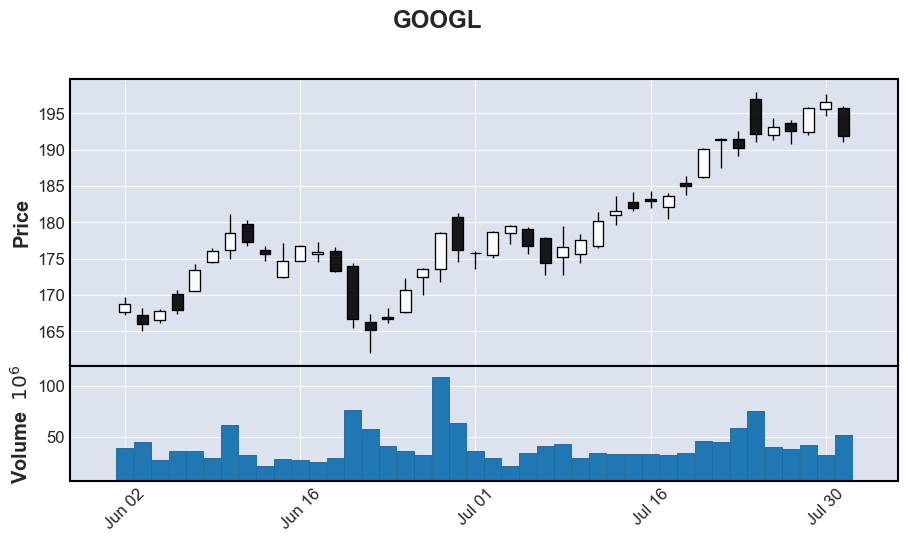

In [47]:
mpf.plot(google_cut, type='candle', volume=True, figratio = (10,5), title='GOOGL')

## Defining your own Features / Signals / Indicators

In [62]:
g = google.copy()

In [70]:
g['MaxClose'] = g.Close.rolling(window = 5).max()
g['MinClose'] = g.Close.rolling(window = 5).min()
g['Range'] = (g.Close - g.MinClose) / (g.MaxClose - g.MinClose)

In [71]:
g['CloseRatio'] = g.Close.rolling(window = 5).mean() / g.Close.rolling(window = 3).mean()

In [72]:
g['Sharpe'] = g.Close.rolling(window = 6).mean() / g.Close.rolling(window = 6).std()

In [73]:
g.head(10)

Price,Close,High,Low,Open,Volume,MaxClose,MinClose,Range,CloseRatio,Sharpe
Date,,,,,,,,,,
2020-01-02,68.026016,68.026016,66.923134,67.018562,27278000,NaN,NaN,NaN,NaN,NaN
2020-01-03,67.670158,68.278016,66.964392,66.998193,23408000,NaN,NaN,NaN,NaN,NaN
2020-01-06,69.473846,69.499192,67.147300,67.178606,46768000,NaN,NaN,NaN,NaN,NaN
2020-01-07,69.339653,69.756654,69.163213,69.605560,34330000,NaN,NaN,NaN,NaN,NaN
2020-01-08,69.833191,70.171661,69.216391,69.325236,35314000,69.833191,67.670158,1.000000,0.990218,NaN
2020-01-09,70.566292,71.008138,70.090144,70.672649,33200000,70.566292,67.670158,1.000000,0.992327,62.778264
2020-01-10,71.022057,71.319278,70.556852,71.047410,26258000,71.022057,69.339653,1.000000,0.993943,59.712822
2020-01-13,71.572258,71.644320,70.843626,71.334677,30730000,71.572258,69.339653,1.000000,0.991741,78.270949
2020-01-14,71.103081,71.701489,70.962915,71.570773,26076000,71.572258,69.833191,0.730213,0.994201,83.758452


## Calculating Technical Indicators

In [74]:
import pandas_ta as ta

In [102]:
# Relative Strength Index (14-period)
g['rsi_14'] = ta.rsi(g['Close'], length=14)

# Average True Range (14-period)
g['atr_14'] = ta.atr(g['High'], g['Low'], g['Close'], length=14) 

# On-Balance Volume
g['obv'] = ta.obv(g['Close'], g['Volume']) / pow(10.0, 9)

# Commodity Channel Index
g['cci_20'] = ta.cci(g['High'], g['Low'], g['Close'], length=20)

# volume-weighted average price
g['vwap'] = ta.vwap(g['High'], g['Low'], g['Close'], g['Volume'])

In [106]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'rsi_14', 'atr_14', 'obv', 'cci_20', 'vwap']
g[cols].tail(7)

Price,Open,High,Low,Close,Volume,rsi_14,atr_14,obv,cci_20,vwap
Date,,,,,,,,,,
2025-07-23,191.500000,192.529999,189.179993,190.229996,58681900,70.509422,4.155872,3.216226,156.708166,190.646662
2025-07-24,197.029999,197.949997,191.000000,192.169998,74881700,72.547018,4.410453,3.291108,171.848326,193.706665
2025-07-25,191.979996,194.330002,191.259995,193.179993,39785900,73.570829,4.314707,3.330894,141.414104,192.923330
2025-07-28,193.649994,194.050003,190.839996,192.580002,38139500,71.856452,4.235799,3.292755,118.819425,192.490000
2025-07-29,192.429993,195.919998,192.080002,195.750000,41389200,75.151086,4.207528,3.334144,123.549723,194.583333
2025-07-30,195.600006,197.600006,194.690002,196.529999,32445400,75.898718,4.114847,3.366589,124.320120,196.273336
2025-07-31,195.710007,195.990005,191.089996,191.899994,51329200,63.655662,4.209501,3.315260,79.197315,192.993332


## Price Changes as Targets

In [109]:
g['change'] = 100.0 * (g.Close - g.Open) / g.Open
g['next_change'] = g.change.shift(-1)

In [111]:
cols = ['Open', 'Close', 'change', 'next_change']
g[cols]

Price,Open,Close,change,next_change
Date,,,,
2020-01-02,67.018562,68.026016,1.503247,1.002960
2020-01-03,66.998193,67.670158,1.002960,3.416624
2020-01-06,67.178606,69.473846,3.416624,-0.382020
2020-01-07,69.605560,69.339653,-0.382020,0.732713
2020-01-08,69.325236,69.833191,0.732713,-0.150492
...,...,...,...,...
2025-07-25,191.979996,193.179993,0.625064,-0.552539
2025-07-28,193.649994,192.580002,-0.552539,1.725307
2025-07-29,192.429993,195.750000,1.725307,0.475456


## The first model predicting prices

Take only the needed columns (the features and the target) and remove rows with missing values.

In [137]:
features = ['Range', 'CloseRatio', 'Sharpe', 'rsi_14', 'atr_14', 'obv', 'cci_20', 'vwap']
target = 'next_change'
g_for_ml = g[features + [target]].dropna()
len(g_for_ml)

1382

Extract numpy array (tensors) from pandas data-frames to use them with scikit-learn

In [138]:
X = g_for_ml[features].values
y = g_for_ml[target].values

Split the data into training and testing datasets.

In [139]:
k = int(n/2)
X1 = X[:k]
X2 = X[k:]
y1 = y[:k]
y2 = y[k:]

Fit the linear model.

In [140]:
m1.fit(X1,y1)

LinearRegression()

Generate predictions for out-of-sample dataset.

In [141]:
p2 = m1.predict(X2)

## Examining price predictions

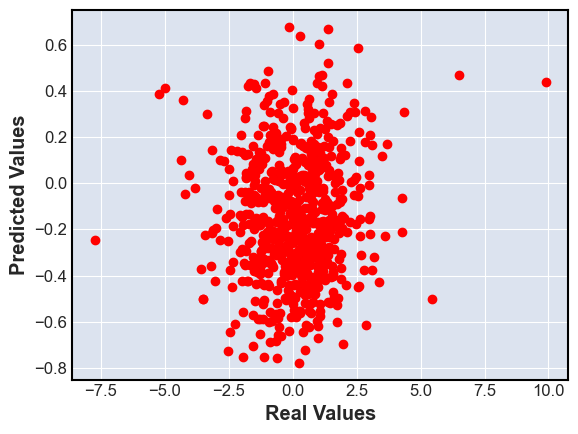

In [147]:
plt.figure()
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.scatter(y2,p2, color = 'r')
plt.show()

In [143]:
from scipy.stats import pearsonr

In [148]:
pearsonr(p2,y2).correlation, 100.0*pearsonr(p2,y2).pvalue

(0.06270756520353936, 9.9553322824766)